# **Step 1: Data Cleaning**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1.1. Parse Date and Set as Index

In [3]:
df = pd.read_csv('AirPassengers.csv')
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

1.2. Check and Handle Missing Values

In [5]:
print(df.isnull().sum())  # See if there are missing values
# If found, fill them
df = df.interpolate()
print(df.isnull().sum())

#Passengers    0
dtype: int64
#Passengers    0
dtype: int64


1.3. Summary Statistics and Data Types

In [6]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB
None
       #Passengers
count   144.000000
mean    280.298611
std     119.966317
min     104.000000
25%     180.000000
50%     265.500000
75%     360.500000
max     622.000000


# **Step 2: Exploratory Data Analysis (EDA)**

2.1. Plot Time Series (Trend & Seasonality)

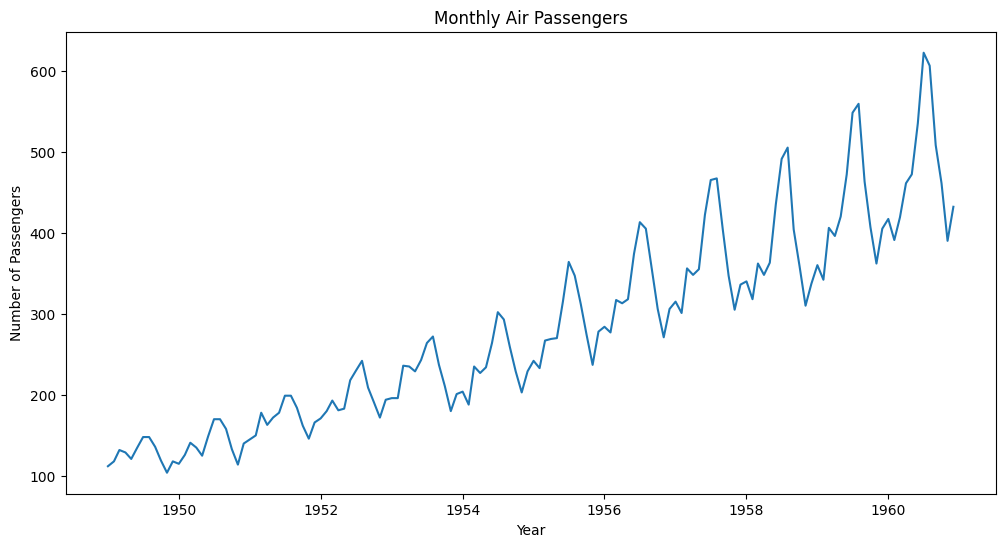

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(df['#Passengers'])
plt.title('Monthly Air Passengers')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.show()


2.2. Seasonal Decomposition

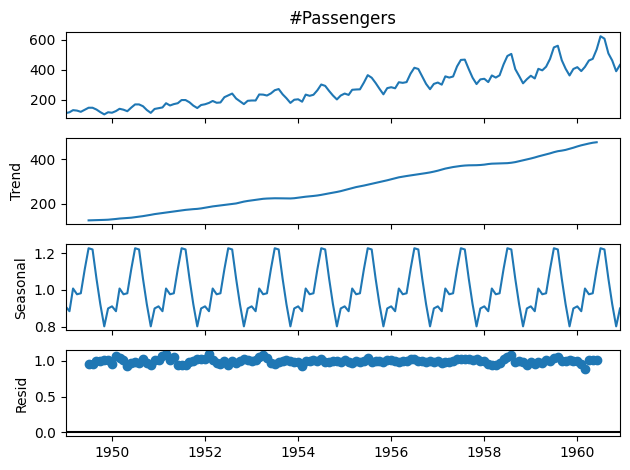

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['#Passengers'], model='multiplicative', period=12)
decomposition.plot()
plt.show()

2.3. Rolling Statistics

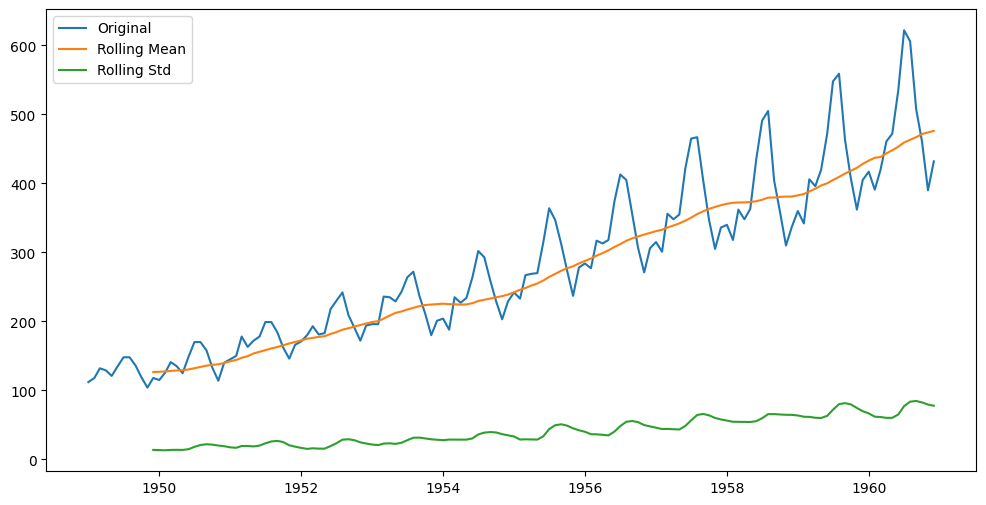

In [9]:
df['rolling_mean'] = df['#Passengers'].rolling(window=12).mean()
df['rolling_std'] = df['#Passengers'].rolling(window=12).std()
plt.figure(figsize=(12,6))
plt.plot(df['#Passengers'], label='Original')
plt.plot(df['rolling_mean'], label='Rolling Mean')
plt.plot(df['rolling_std'], label='Rolling Std')
plt.legend()
plt.show()

# **Step 3: Stationarity & Correlation**

3.1. Augmented Dickey–Fuller (ADF) Test

In [10]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df['#Passengers'])
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])

ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641


3.2. AutoCorrelation and Partial AutoCorrelation

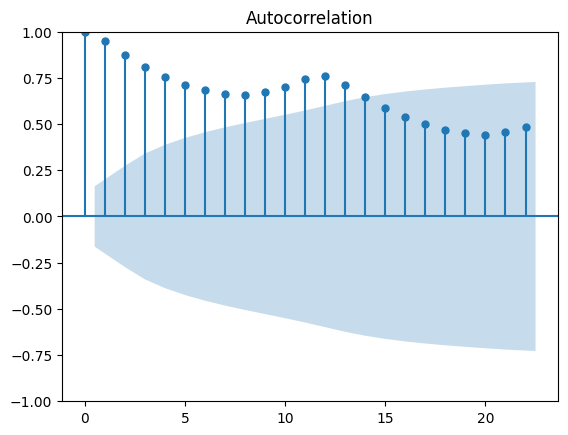

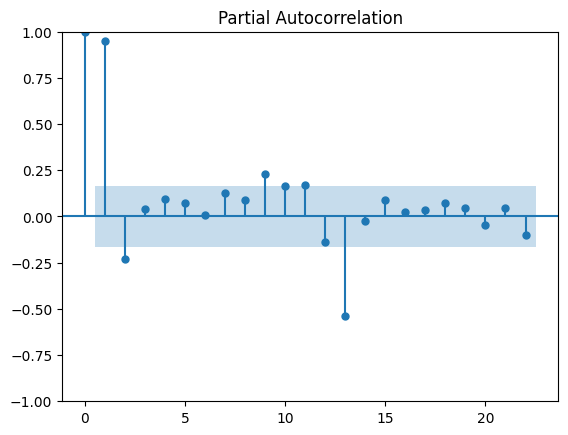

In [11]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df['#Passengers'])
plt.title('Autocorrelation')
plt.show()

plot_pacf(df['#Passengers'])
plt.title('Partial Autocorrelation')
plt.show()

3.3. Differencing for Stationarity

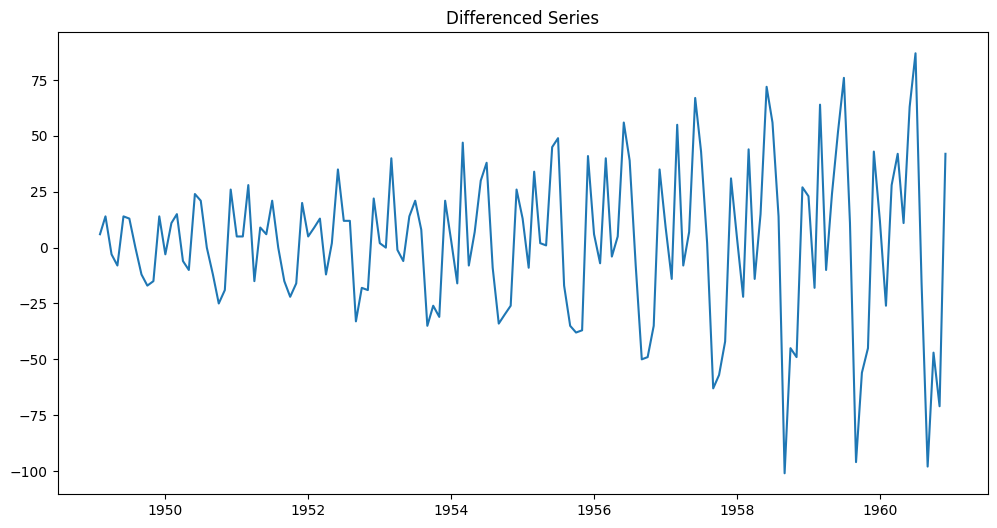

In [12]:
df['diff'] = df['#Passengers'].diff()
plt.figure(figsize=(12,6))
plt.plot(df['diff'])
plt.title('Differenced Series')
plt.show()

# **Step 4: Model Building and Forecasting**

4.1. Train/Test Split

In [13]:
n = len(df)
train = df.iloc[:int(n*0.8)]
test = df.iloc[int(n*0.8):]

4.2. ARIMA Model Fit

In [14]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train['#Passengers'], order=(2,1,2))  # Tune (p,d,q)
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  115
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -523.758
Date:                Sun, 26 Oct 2025   AIC                           1057.516
Time:                        14:41:22   BIC                           1071.197
Sample:                    01-01-1949   HQIC                          1063.069
                         - 07-01-1958                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3280      0.145      2.268      0.023       0.045       0.611
ar.L2          0.2521      0.165      1.528      0.126      -0.071       0.575
ma.L1         -0.0125      0.109     -0.114      0.9

4.3. Forecast and Compare

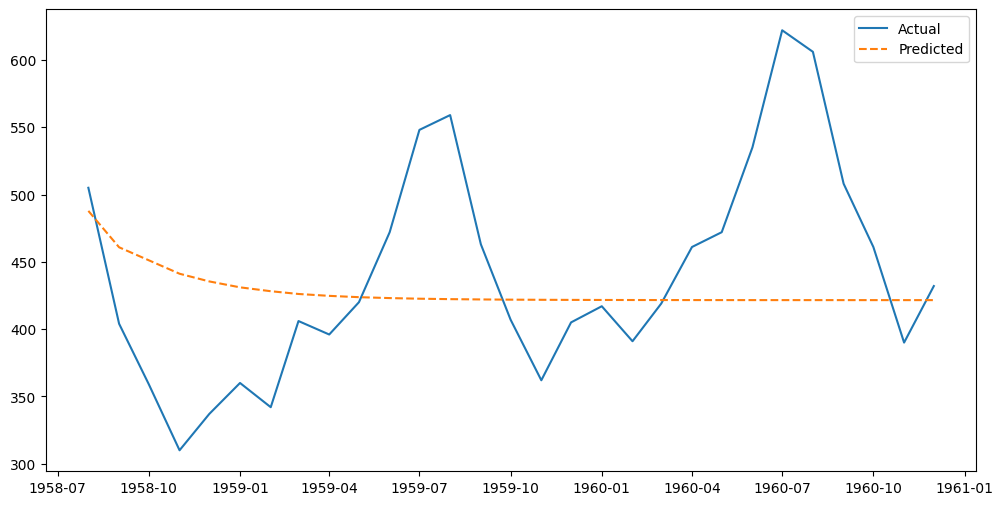

In [15]:
forecast = model_fit.forecast(steps=len(test))
plt.figure(figsize=(12,6))
plt.plot(test.index, test['#Passengers'], label='Actual')
plt.plot(test.index, forecast, label='Predicted', linestyle='dashed')
plt.legend()
plt.show()

# **Step 5: Model Evaluation**

5.1. MAE, MSE, RMSE, MAPE

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(test['#Passengers'], forecast)
mse = mean_squared_error(test['#Passengers'], forecast)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test['#Passengers'] - forecast) / test['#Passengers'])) * 100

print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}, MAPE: {mape}")

MAE: 63.54531127532635, MSE: 6808.397034418323, RMSE: 82.51301130378361, MAPE: 14.216158878297506


5.2. Residual Plot

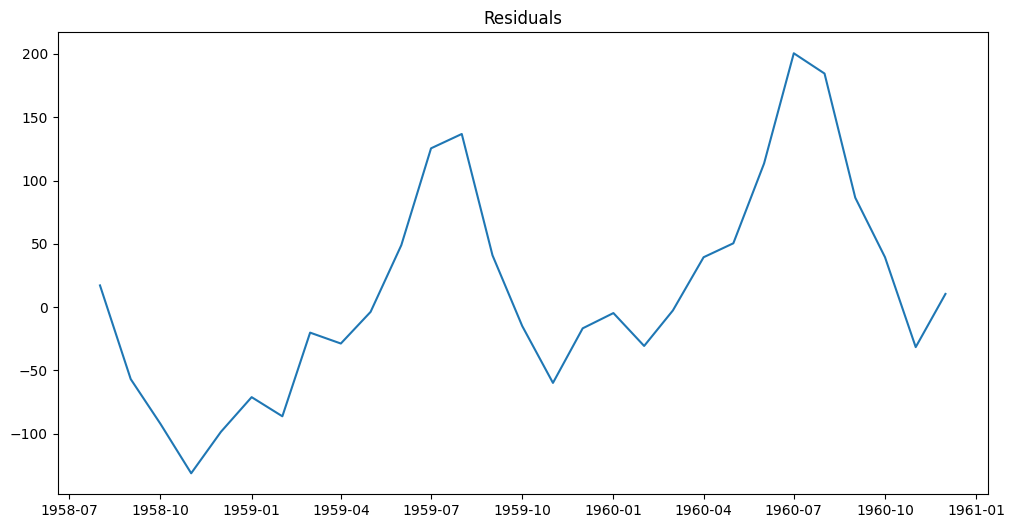

In [17]:
residuals = test['#Passengers'] - forecast
plt.figure(figsize=(12,6))
plt.plot(residuals)
plt.title('Residuals')
plt.show()

# **Step 6: Future Forecasting**

6.1. Forecast Next 12 or 24 Months

/tmp/ipython-input-4164769087.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(df.index[-1], periods=25, freq='M')[1:], future_forecast, label='Forecast')


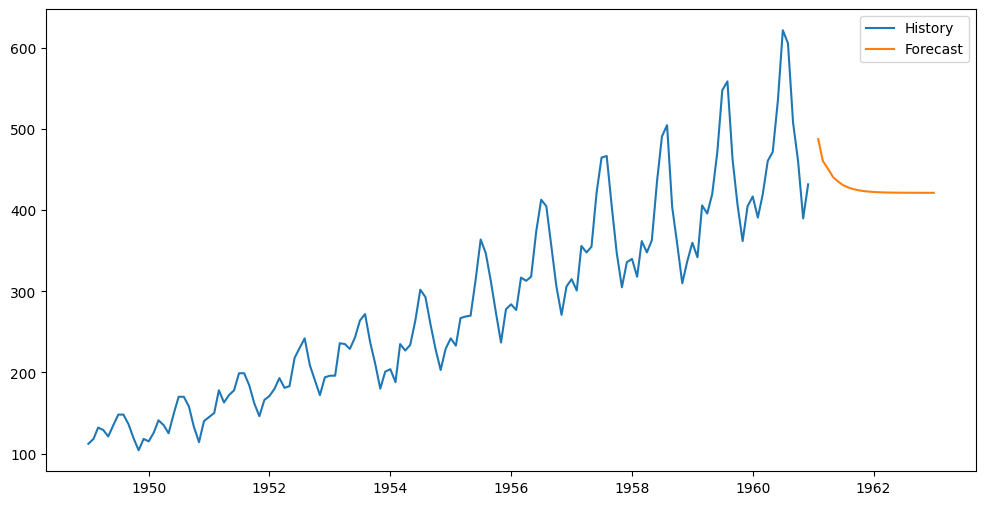

In [18]:
future_forecast = model_fit.forecast(steps=24)
plt.figure(figsize=(12,6))
plt.plot(df.index, df['#Passengers'], label='History')
plt.plot(pd.date_range(df.index[-1], periods=25, freq='M')[1:], future_forecast, label='Forecast')
plt.legend()
plt.show()

Confidence Intervals for Forecasts

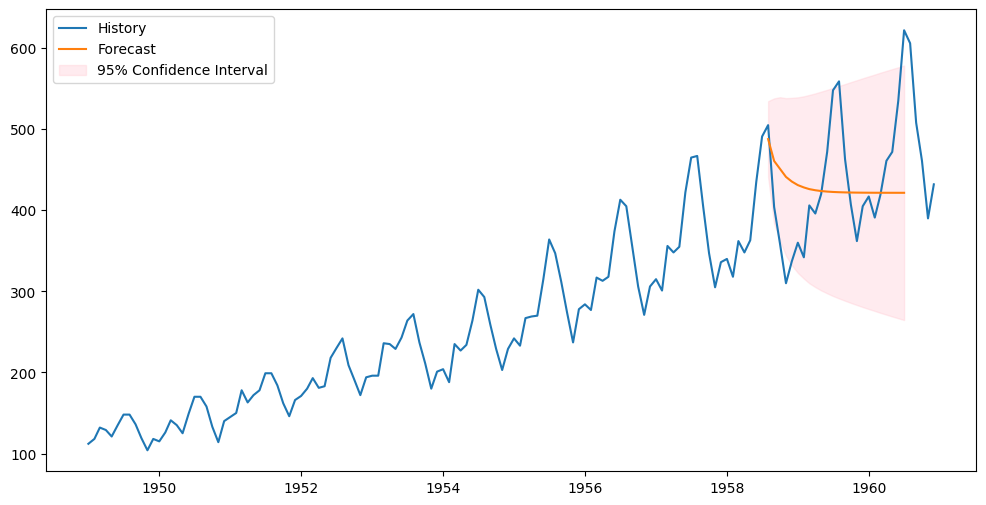

In [19]:
# Future Forecast with Confidence Intervals
forecast_res = model_fit.get_forecast(steps=24)
future_pred = forecast_res.predicted_mean
conf_int = forecast_res.conf_int()

plt.figure(figsize=(12,6))
plt.plot(df.index, df['#Passengers'], label='History')
plt.plot(future_pred.index, future_pred, label='Forecast')
plt.fill_between(future_pred.index, conf_int.iloc[:,0], conf_int.iloc[:,1], color='pink', alpha=0.3, label='95% Confidence Interval')
plt.legend()
plt.show()